   SOURCEID   
--------------
45195940855819
45195940855827
45195940855830
45195940855833
45195940855837
45195940855839
45195940855840
45195940855841
45195940855842
45195940855843
           ...
45195940913112
45195940913125
45195940913131
45195940913133
45195940913141
45195940913146
45195940913158
45195940913167
45195940913172
45195940913173
45195940913180
Length = 37947 rows


/Users/tsrice/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:171: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order, subok=True)


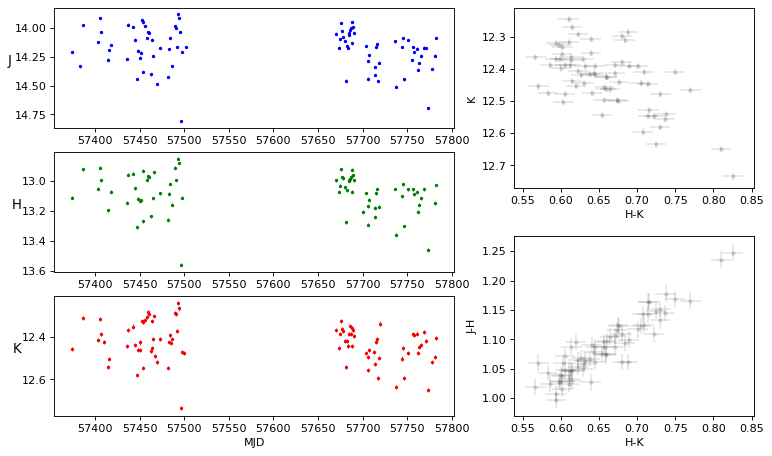

In [9]:
import astropy.table
import pandas as pd
from wuvars.analysis.variability_selection import data_nuller, sq2, sq2_variables

dat = astropy.table.Table.read("/Users/tsrice/Documents/Variability_Project_2020/wuvars/Data/reduction_artifacts/wserv11/WSERV11_graded_clipped0.95_scrubbed0.1_dusted0.5_new_error_corrected.fits")
df = dat.to_pandas()
data_nuller(df)
dat_again = astropy.table.Table.from_pandas(df)

wserv=11
spreadsheet_path = os.path.join("/Users/tsrice/Documents/Variability_Project_2020/wuvars/Data/analysis_artifacts",
                                f"wserv{str(wserv)}",
                                f"WSERV{str(wserv)}_graded_clipped0.95_scrubbed0.1_dusted0.5_summary_spreadsheet.h5",)

ds = pd.read_hdf(spreadsheet_path, key='table')

q2 = sq2(ds, 50, 150)
v2 = sq2_variables(ds, 50, 150)

ds[v2].index

dat_by_source = dat_again.group_by("SOURCEID")
print(dat_by_source.groups.keys)

sourceid = 45195940855911

dat_source = dat_by_source.groups[dat_by_source.groups.keys['SOURCEID'] == sourceid]

ds[v2].index

%run ../lightcurve.py
sourceid = 45195940911195
fig = simple_lc(dat_by_source, sourceid)

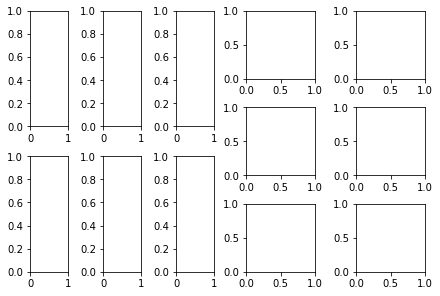

In [10]:
fig10 = plt.figure(constrained_layout=True)
gs0 = fig10.add_gridspec(1, 2)

gs00 = gs0[0].subgridspec(2, 3)
gs01 = gs0[1].subgridspec(3, 2)

for a in range(2):
    for b in range(3):
        fig10.add_subplot(gs00[a, b])
        fig10.add_subplot(gs01[b, a])

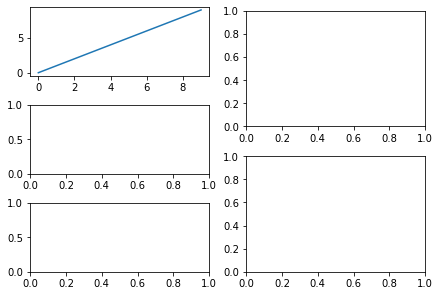

In [11]:
fig10 = plt.figure(constrained_layout=True)
gs0 = fig10.add_gridspec(1, 2)

gs00 = gs0[0].subgridspec(3, 1)
gs01 = gs0[1].subgridspec(2, 1)


left_axes = []
for a in range(3):
    left_axes.append(fig10.add_subplot(gs00[a, 0]))
    
right_axes = []
for b in range(2):
    right_axes.append(fig10.add_subplot(gs01[b, 0]))
    
left_axes[0].plot(np.arange(10))

[(array([ 60., 154., 235., 207., 157.,  93.,  54.,  28.,   6.,   6.]),
  array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
  <BarContainer object of 10 artists>),
 (array([ 60., 154., 235., 207., 157.,  93.,  54.,  28.,   6.,   6.]),
  array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
  <BarContainer object of 10 artists>)]

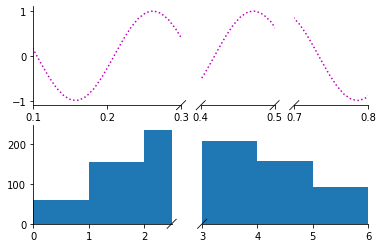

In [12]:
from brokenaxes import brokenaxes
from matplotlib.gridspec import GridSpec
import numpy as np

sps1, sps2 = GridSpec(2,1)

bax = brokenaxes(xlims=((.1, .3), (.4, .5), (.7, .8)), subplot_spec=sps1)
x = np.linspace(0, 1, 100)
bax.plot(x, np.sin(x*30), ls=':', color='m')

x = np.random.poisson(3, 1000)
bax = brokenaxes(xlims=((0, 2.5), (3, 6)), subplot_spec=sps2)
bax.hist(x, histtype='bar')

[(array([ 55., 135., 244., 248., 143.,  90.,  52.,  23.,   7.,   3.]),
  array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
  <BarContainer object of 10 artists>),
 (array([ 55., 135., 244., 248., 143.,  90.,  52.,  23.,   7.,   3.]),
  array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
  <BarContainer object of 10 artists>)]

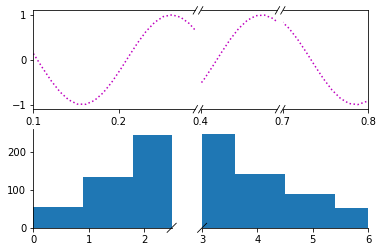

In [13]:
from brokenaxes import brokenaxes
from matplotlib.gridspec import GridSpec
import numpy as np

sps1, sps2 = GridSpec(2,1)

bax = brokenaxes(xlims=((.1, .29), (.4, .49), (.7, .8)), subplot_spec=sps1, wspace=0.05, d=0.01, tilt=60, despine=False)
x = np.linspace(0, 1, 100)
bax.plot(x, np.sin(x*30), ls=':', color='m')

x = np.random.poisson(3, 1000)
bax = brokenaxes(xlims=((0, 2.5), (3, 6)), subplot_spec=sps2)
bax.hist(x, histtype='bar')

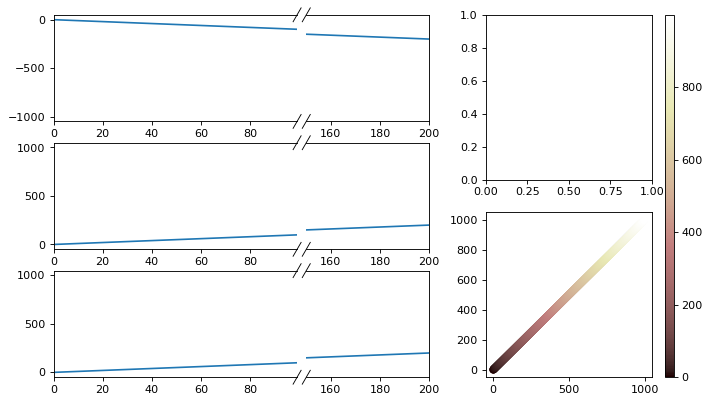

In [39]:
fig10 = plt.figure(constrained_layout=False, figsize=(10,6), dpi=80)
gs0 = fig10.add_gridspec(1, 2, width_ratios=[6, 3], wspace=0.2)

gs00 = gs0[0].subgridspec(3, 1)
gs_right = gs0[1].subgridspec(1, 2, width_ratios=(2, 0.1), wspace=0.15)
gs01 = gs_right[0].subgridspec(2, 1)

bax_kwargs = dict(despine=False, d=0.01, tilt=60, wspace=0.05)

bax0 = brokenaxes(xlims=((0,99), (150,200)), subplot_spec=gs00[0,0], **bax_kwargs)
bax1 = brokenaxes(xlims=((0,99), (150,200)), subplot_spec=gs00[1,0], **bax_kwargs)
bax2 = brokenaxes(xlims=((0,99), (150,200)), subplot_spec=gs00[2,0], **bax_kwargs)

x_array = np.arange(1000)
bax0.plot(-x_array)
bax1.plot(x_array)
bax2.plot(x_array)

bax3 = fig10.add_subplot(gs01[0,0])
bax4 = fig10.add_subplot(gs01[1,0]) 

bax5 = fig10.add_subplot(gs_right[1])

sc = bax4.scatter(x_array, x_array, marker='o', c=x_array, cmap='pink')
fig10.colorbar(sc, cax=bax5)

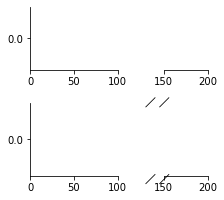

In [25]:
fig10 = plt.figure(constrained_layout=True)
gs0 = fig10.add_gridspec(1, 2)

gs00 = gs0[0].subgridspec(3, 1)
gs01 = gs0[1].subgridspec(2, 1)

bax0 = brokenaxes(xlims=((0,100), (150,200)), subplot_spec=gs00[0,0])
bax1 = brokenaxes(xlims=((0,100), (150,200)), subplot_spec=gs00[1,0])

In [30]:
gs0 = fig10.add_gridspec?

In [ ]:
gs0 = fig10.add_gridspec

In [6]:
np.__version__

'1.19.2'

In [8]:
plt.scatter?

# Update

We're now focusing explicitly on developing `lightcurve.simple_lc_brokenaxes()`.

We're going to prototype it on WSERV8 (IC 348) data.

In [1]:
from wuvars.data import spreadsheet, photometry
from wuvars.plotting.lightcurve import simple_lc

dat = photometry.group_wserv_v2(photometry.load_wserv_v2(8))

Loading WSERV8 photometry data... DONE (elapsed time: 0.47s)


/Users/tsrice/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:171: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order, subok=True)


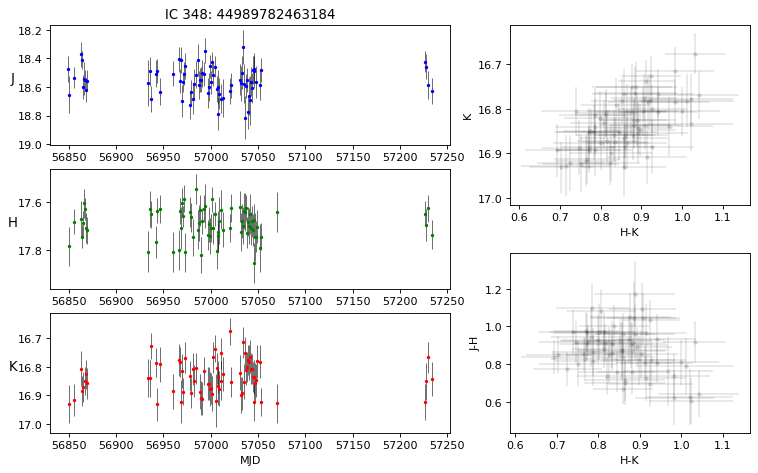

In [227]:
sid = 44989782463184
fig_lc = simple_lc(dat, sid)
fig_lc.ax_j.set_title("IC 348: " + str(sid))

fig_lc.savefig("example_IC348_simple_lc.png")
fig_lc.savefig("example_IC348_simple_lc.pdf")

/Users/tsrice/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:171: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order, subok=True)


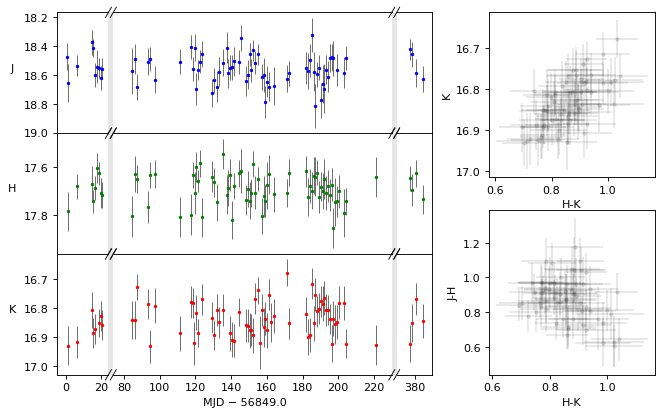

In [239]:
%run ../lightcurve.py

sid = 44989782463184

custom_xlims = [(-5.0, 24.0), (74.0, 230.0), (370.0, 390.0)]

fig_lc = simple_lc_brokenaxes(dat, sid, date_offset = None, xlims=custom_xlims)
# fig_lc.ax_j.set_title(str(sid))

# fig_lc.ax_j.axvline(25.5, color='0.5', lw=1, ls=":")
# fig_lc.ax_j.axvline(79, color='0.5', lw=1, ls=":")

# fig_lc.ax_h.big_ax.set_zorder(-100)
# fig_lc.ax_h.big_ax.set_facecolor('0.9')

/Users/tsrice/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:171: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order, subok=True)


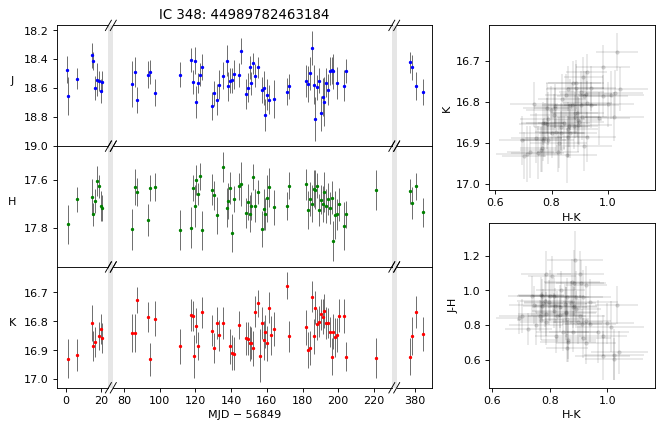

In [228]:
%run ../lightcurve.py

sid = 44989782463184

# custom_xlims = [(-5.0, 24.0), (74.0, 230.0), (370.0, 390.0)]

fig_lc = ic348_simple_lc_brokenaxes(dat, sid)

fig_lc.ax_j.set_title("IC 348: " + str(sid))

fig_lc.savefig("example_IC348_brokenaxes.png")
fig_lc.savefig("example_IC348_brokenaxes.pdf")

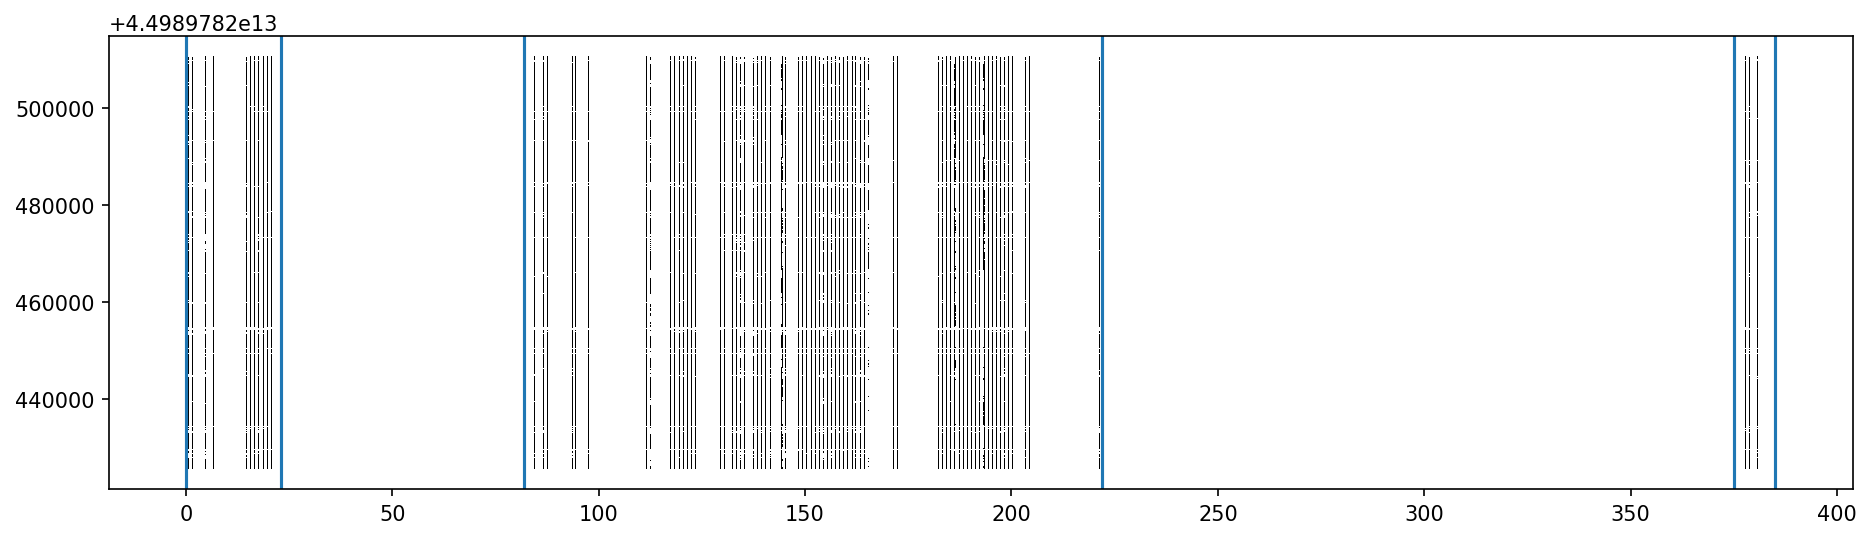

In [69]:
fig, ax = plt.subplots(1, figsize=(15,4), dpi=150)
plt.plot(dat['MEANMJDOBS'] - 56849, dat['SOURCEID'], 'k,')
for x in [0, 23, 82, 222, 375, 385]:
    plt.axvline(x)

In [11]:
np.min(dat['MEANMJDOBS'][dat['SOURCEID'] == sid])

56849.629

In [12]:
np.max(dat['MEANMJDOBS'][dat['SOURCEID'] == sid])

57233.5954203

In [36]:
plt.ylabel?

In [43]:
for x in dat['MEANMJDOBS'][dat['SOURCEID'] == sid] - 56849:
    print(x)

0.6290000000008149
1.6195833000019775
4.618503300000157
6.630839999997988
14.579403299998376
15.623483299998043
16.62510669999756
17.5902700000006
18.628736699996807
19.629260000001523
20.611030000000028
84.41687670000101
86.42561330000171
87.4657967000021
93.57949669999653
94.3964433000001
97.45112669999799
111.42016000000149
117.33815329999925
118.37687670000014
119.36325999999826
119.43279669999902
119.50907000000007
120.35773999999947
121.48141330000362
122.38270329999796
123.41819329999998
129.38322670000343
130.39778330000263
132.28362999999808
133.29432000000088
135.2890600000028
137.48142499999813
138.30302330000268
139.29593000000023
140.2972299999965
141.4464366999964
144.29955000000336
145.25798000000214
148.392399999997
149.28018000000156
150.3266466999994
151.32579670000268
152.31120999999985
153.28679669999838
154.26381330000004
155.32738000000245
156.2801299999992
157.27440000000206
158.24418999999762
159.24555330000294
160.24001670000143
161.3911700000026
161.4428033000

In [62]:
ax.vlines?

In [70]:
np.floor

<ufunc 'floor'>

In [72]:
np.ceil(np.pi)

4.0

In [74]:
straight_list = [1, 2, 3, 4, 5, 6]
paired_list = []

for i in range(len(straight_list)//2):
    j = i*2
    pair = (straight_list[j], straight_list[j+1])
    paired_list.append(pair)
    
print(paired_list)

[(1, 2), (3, 4), (5, 6)]


In [83]:
[tuple(x) for x in list(np.array(straight_list).reshape(len(straight_list)//2,2))]

[(1, 2), (3, 4), (5, 6)]

In [84]:
paired_list = [(straight_list[i], straight_list[i+1]) for i in range(0, len(straight_list), 2)]

In [85]:
paired_list

[(1, 2), (3, 4), (5, 6)]

In [101]:
%run ../lightcurve_helpers.py

In [98]:
dates = dat['MEANMJDOBS'] - 56849

In [102]:
produce_xlims(dates, [50, 350])

[(-10.0, 31.0), (74.0, 232.0), (367.0, 395.0)]

In [106]:
brokenaxes?

In [116]:
ax.axvspan?

In [148]:
dat11 = photometry.group_wserv_v2(photometry.load_wserv_v2(11))

Loading WSERV11 photometry data... DONE (elapsed time: 0.70s)


In [152]:
dat11['SOURCEID'][1000]


45195940855897

57374.0

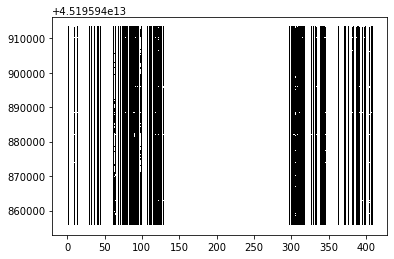

In [159]:
plt.plot(dat11['MEANMJDOBS'] - 57374.0, dat11['SOURCEID'], 'k,')
np.floor(np.min(dat11['MEANMJDOBS']))

/Users/tsrice/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:171: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order, subok=True)


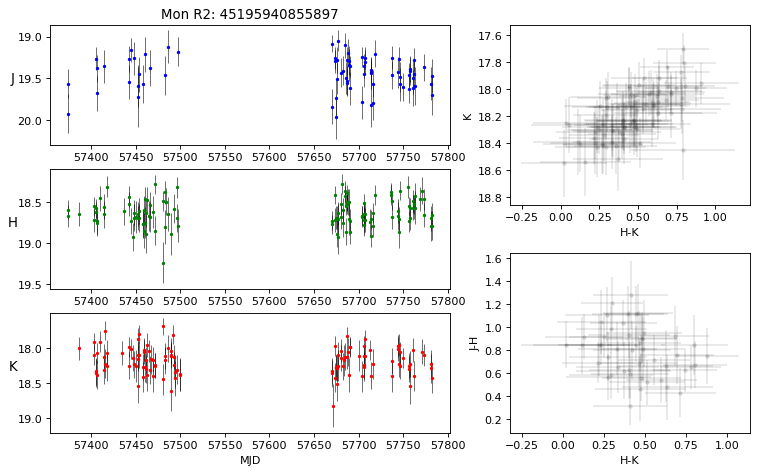

In [229]:
fig_lc = simple_lc(dat11, 45195940855897)

fig_lc.ax_j.set_title("Mon R2: " + str(45195940855897))

fig_lc.savefig("example_MonR2_simple_lc.png")
fig_lc.savefig("example_MonR2_simple_lc.pdf")

[(-5.0, 131.0), (291.0, 414.0)]


/Users/tsrice/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:171: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order, subok=True)


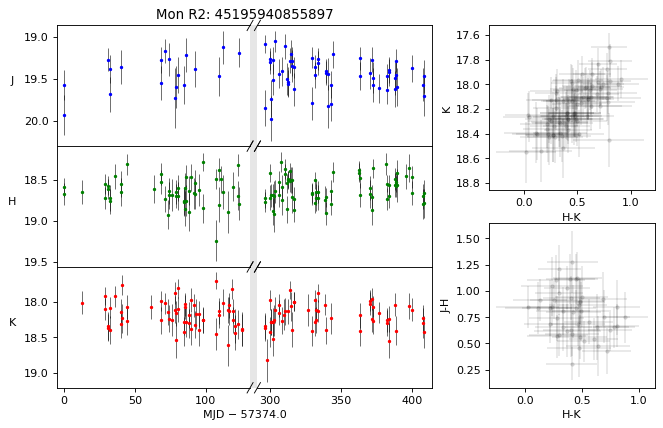

In [238]:
%run ../lightcurve.py

fig_lc = simple_lc_brokenaxes(dat11, 45195940855897, date_offset = None, breaks=[200])
fig_lc.ax_j.set_title("Mon R2: " + str(45195940855897))

fig_lc.savefig("example_MonR2_brokenaxes.png")
fig_lc.savefig("example_MonR2_brokenaxes.pdf")

In [163]:
dat5 = photometry.group_wserv_v2(photometry.load_wserv_v2(5))

Loading WSERV5 photometry data... DONE (elapsed time: 0.22s)


54034.0

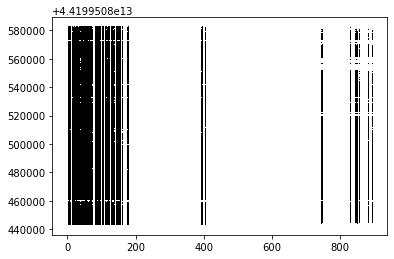

In [164]:
plt.plot(dat5['MEANMJDOBS'] - np.floor(np.min(dat5['MEANMJDOBS'])), dat5['SOURCEID'], 'k,')
np.floor(np.min(dat5['MEANMJDOBS']))

44199508443333

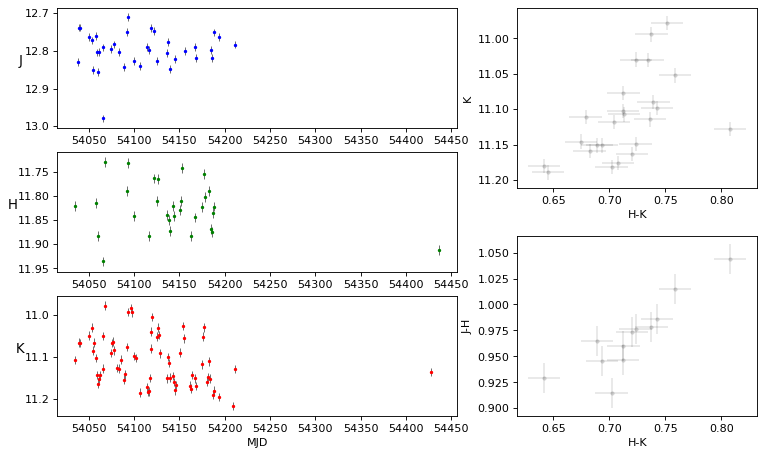

In [170]:
fig_lc = simple_lc(dat5, dat5['SOURCEID'][1100])
dat5['SOURCEID'][1100]

/Users/tsrice/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:171: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order, subok=True)


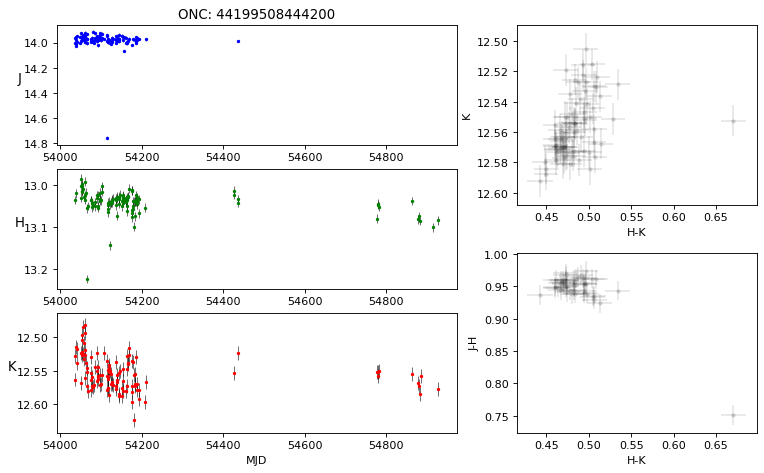

In [235]:
fig_lc = simple_lc(dat5, valid_onc_sources[600])

fig_lc.ax_j.set_title("ONC: " + str(valid_onc_sources[600]))

fig_lc.savefig("example_ONC_simple_lc.png")
fig_lc.savefig("example_ONC_simple_lc.pdf")

In [193]:
onc_breaks = [300, 600, 800]

[(-10.0, 188.0), (381.0, 413.0), (734.0, 759.0), (819.0, 905.0)]


/Users/tsrice/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:171: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order, subok=True)


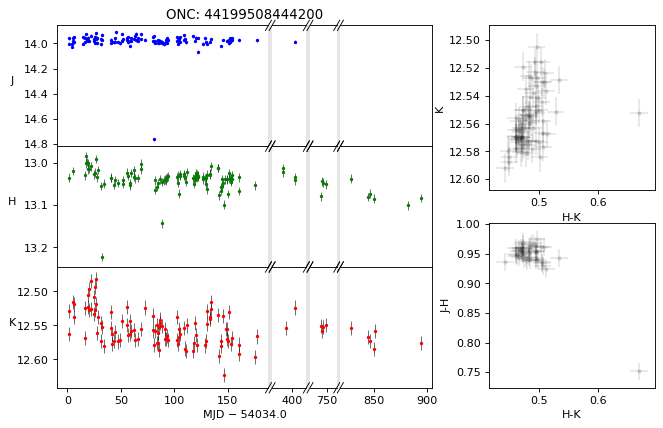

In [233]:
fig_lc = simple_lc_brokenaxes(dat5, valid_onc_sources[600], date_offset = 54034.0, breaks=onc_breaks, pad=10)
fig_lc.ax_j.set_title("ONC: " + str(valid_onc_sources[600]))

fig_lc.savefig("example_ONC_brokenaxes.png")
fig_lc.savefig("example_ONC_brokenaxes.pdf")

In [202]:
valid_onc_sources = dat5[dat5['JAPERMAG3'] < 14]['SOURCEID']

In [203]:
valid_onc_sources

44199508443147
44199508443147
44199508443147
44199508443147
44199508443147
44199508443147
44199508443153
44199508443153
44199508443153
44199508443153
44199508443153


In [210]:
fig_lc = simple_lc_brokenaxes(dat5, valid_onc_sources[500], date_offset = 54034.0, breaks=onc_breaks, pad=10)


ValueError: zero-size array to reduction operation minimum which has no identity

<Figure size 800x480 with 0 Axes>

In [212]:
%run ../lightcurve_helpers.py

In [218]:
dates = dat5[dat5["SOURCEID"] == valid_onc_sources[600]]['MEANMJDOBS'] - 54034

In [226]:
produce_xlims(dates, breaks=[300, 600, 800, 1000, 1100])

[(-10.0, 188.0), (381.0, 413.0), (734.0, 759.0), (819.0, 905.0)]